In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('default')
sns.set_palette("husl")

print("Librerías importadas correctamente!")
print("="*50)

# Cargar todas las tablas del dataset Olist
print("Cargando dataset de Olist...")

# Tabla principal - Orders
orders = pd.read_csv('Olist/olist_orders_dataset.csv')
print(f"✓ Orders cargada: {orders.shape}")

# Clientes
customers = pd.read_csv('Olist/olist_customers_dataset.csv')
print(f"✓ Customers cargada: {customers.shape}")

# Items de pedidos
order_items = pd.read_csv('Olist/olist_order_items_dataset.csv')
print(f"✓ Order Items cargada: {order_items.shape}")

# Productos
products = pd.read_csv('Olist/olist_products_dataset.csv')
print(f"✓ Products cargada: {products.shape}")

# Vendedores
sellers = pd.read_csv('Olist/olist_sellers_dataset.csv')
print(f"✓ Sellers cargada: {sellers.shape}")

# Pagos
payments = pd.read_csv('Olist/olist_order_payments_dataset.csv')
print(f"✓ Payments cargada: {payments.shape}")

# Reseñas
reviews = pd.read_csv('Olist/olist_order_reviews_dataset.csv')
print(f"✓ Reviews cargada: {reviews.shape}")

# Geolocalización
geolocation = pd.read_csv('Olist/olist_geolocation_dataset.csv')
print(f"✓ Geolocation cargada: {geolocation.shape}")

# Traducción de categorías
category_translation = pd.read_csv('Olist/product_category_name_translation.csv')
print(f"✓ Category Translation cargada: {category_translation.shape}")

print("="*50)
print("🎉 ¡Todas las tablas del dataset Olist han sido cargadas exitosamente!")
print("="*50)

Librerías importadas correctamente!
Cargando dataset de Olist...
✓ Orders cargada: (99441, 8)
✓ Customers cargada: (99441, 5)
✓ Order Items cargada: (112650, 7)
✓ Products cargada: (32951, 9)
✓ Sellers cargada: (3095, 4)
✓ Payments cargada: (103886, 5)
✓ Reviews cargada: (99224, 7)
✓ Geolocation cargada: (1000163, 5)
✓ Category Translation cargada: (71, 2)
🎉 ¡Todas las tablas del dataset Olist han sido cargadas exitosamente!


# 📊 Análisis Exploratorio del Dataset Olist

El dataset Olist contiene información completa sobre un marketplace brasileño de e-commerce. Vamos a explorar cada tabla y entender sus relaciones.

In [34]:
# Función para explorar la estructura de cada tabla
def explore_table(df, table_name):
    print(f"\n📋 TABLA: {table_name.upper()}")
    print("="*60)
    print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    print(f"\nColumnas:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    
    print(f"\nTipos de datos:")
    print(df.dtypes.to_string())
    
    print(f"\nPrimeras 3 filas:")
    display(df.head(3))
    
    print(f"\nValores nulos:")
    null_counts = df.isnull().sum()
    null_pct = (null_counts / len(df) * 100).round(2)
    null_info = pd.DataFrame({
        'Nulos': null_counts,
        'Porcentaje': null_pct
    })
    print(null_info[null_info['Nulos'] > 0].to_string())
    if null_info['Nulos'].sum() == 0:
        print("  ✓ No hay valores nulos")
    
    print("\n" + "="*60)

# Explorar todas las tablas
tables = [
    (orders, "Orders (Pedidos)"),
    (customers, "Customers (Clientes)"),
    (order_items, "Order Items (Items de Pedidos)"),
    (products, "Products (Productos)"),
    (sellers, "Sellers (Vendedores)"),
    (payments, "Payments (Pagos)"),
    (reviews, "Reviews (Reseñas)"),
    (category_translation, "Category Translation (Traducción Categorías)")
]

for df, name in tables:
    explore_table(df, name)


📋 TABLA: ORDERS (PEDIDOS)
Dimensiones: 99,441 filas x 8 columnas

Columnas:
   1. order_id
   2. customer_id
   3. order_status
   4. order_purchase_timestamp
   5. order_approved_at
   6. order_delivered_carrier_date
   7. order_delivered_customer_date
   8. order_estimated_delivery_date

Tipos de datos:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object

Primeras 3 filas:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



Valores nulos:
                               Nulos  Porcentaje
order_approved_at                160        0.16
order_delivered_carrier_date    1783        1.79
order_delivered_customer_date   2965        2.98


📋 TABLA: CUSTOMERS (CLIENTES)
Dimensiones: 99,441 filas x 5 columnas

Columnas:
   1. customer_id
   2. customer_unique_id
   3. customer_zip_code_prefix
   4. customer_city
   5. customer_state

Tipos de datos:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object

Primeras 3 filas:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



Valores nulos:
Empty DataFrame
Columns: [Nulos, Porcentaje]
Index: []
  ✓ No hay valores nulos


📋 TABLA: ORDER ITEMS (ITEMS DE PEDIDOS)
Dimensiones: 112,650 filas x 7 columnas

Columnas:
   1. order_id
   2. order_item_id
   3. product_id
   4. seller_id
   5. shipping_limit_date
   6. price
   7. freight_value

Tipos de datos:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64

Primeras 3 filas:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



Valores nulos:
Empty DataFrame
Columns: [Nulos, Porcentaje]
Index: []
  ✓ No hay valores nulos


📋 TABLA: PRODUCTS (PRODUCTOS)
Dimensiones: 32,951 filas x 9 columnas

Columnas:
   1. product_id
   2. product_category_name
   3. product_name_lenght
   4. product_description_lenght
   5. product_photos_qty
   6. product_weight_g
   7. product_length_cm
   8. product_height_cm
   9. product_width_cm

Tipos de datos:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64

Primeras 3 filas:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



Valores nulos:
                            Nulos  Porcentaje
product_category_name         610        1.85
product_name_lenght           610        1.85
product_description_lenght    610        1.85
product_photos_qty            610        1.85
product_weight_g                2        0.01
product_length_cm               2        0.01
product_height_cm               2        0.01
product_width_cm                2        0.01


📋 TABLA: SELLERS (VENDEDORES)
Dimensiones: 3,095 filas x 4 columnas

Columnas:
   1. seller_id
   2. seller_zip_code_prefix
   3. seller_city
   4. seller_state

Tipos de datos:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object

Primeras 3 filas:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ



Valores nulos:
Empty DataFrame
Columns: [Nulos, Porcentaje]
Index: []
  ✓ No hay valores nulos


📋 TABLA: PAYMENTS (PAGOS)
Dimensiones: 103,886 filas x 5 columnas

Columnas:
   1. order_id
   2. payment_sequential
   3. payment_type
   4. payment_installments
   5. payment_value

Tipos de datos:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64

Primeras 3 filas:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



Valores nulos:
Empty DataFrame
Columns: [Nulos, Porcentaje]
Index: []
  ✓ No hay valores nulos


📋 TABLA: REVIEWS (RESEÑAS)
Dimensiones: 99,224 filas x 7 columnas

Columnas:
   1. review_id
   2. order_id
   3. review_score
   4. review_comment_title
   5. review_comment_message
   6. review_creation_date
   7. review_answer_timestamp

Tipos de datos:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object

Primeras 3 filas:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



Valores nulos:
                        Nulos  Porcentaje
review_comment_title    87656       88.34
review_comment_message  58247       58.70


📋 TABLA: CATEGORY TRANSLATION (TRADUCCIÓN CATEGORÍAS)
Dimensiones: 71 filas x 2 columnas

Columnas:
   1. product_category_name
   2. product_category_name_english

Tipos de datos:
product_category_name            object
product_category_name_english    object

Primeras 3 filas:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto



Valores nulos:
Empty DataFrame
Columns: [Nulos, Porcentaje]
Index: []
  ✓ No hay valores nulos



## 🔗 Análisis de Relaciones entre Tablas

Vamos a verificar las relaciones principales y la integridad de los datos:

In [35]:
# Análisis de relaciones y integridad de datos
print("🔍 ANÁLISIS DE RELACIONES Y INTEGRIDAD")
print("="*70)

# 1. Verificar relaciones principales
print("\n1️⃣ VERIFICACIÓN DE RELACIONES:")
print("-"*40)

# Orders <-> Customers
orders_customers = orders['customer_id'].nunique()
customers_unique = customers['customer_id'].nunique()
print(f"🔸 Orders únicos: {orders['order_id'].nunique():,}")
print(f"🔸 Customers en orders: {orders_customers:,}")
print(f"🔸 Customers únicos: {customers_unique:,}")
print(f"🔸 Customer únicos reales: {customers['customer_unique_id'].nunique():,}")

# Orders <-> Order Items
orders_in_items = order_items['order_id'].nunique()
print(f"🔸 Orders en order_items: {orders_in_items:,}")

# Products en order_items
products_in_items = order_items['product_id'].nunique()
products_total = products['product_id'].nunique()
print(f"🔸 Products en order_items: {products_in_items:,}")
print(f"🔸 Products totales: {products_total:,}")

# Sellers
sellers_in_items = order_items['seller_id'].nunique()
sellers_total = sellers['seller_id'].nunique()
print(f"🔸 Sellers en order_items: {sellers_in_items:,}")
print(f"🔸 Sellers totales: {sellers_total:,}")

print("\n2️⃣ ANÁLISIS DE ESTADOS DE PEDIDOS:")
print("-"*40)
order_status_counts = orders['order_status'].value_counts()
print(order_status_counts)

print("\n3️⃣ ANÁLISIS DE TIPOS DE PAGO:")
print("-"*40)
payment_types = payments['payment_type'].value_counts()
print(payment_types)

print("\n4️⃣ ANÁLISIS DE DISTRIBUCIÓN DE PUNTUACIONES:")
print("-"*40)
review_scores = reviews['review_score'].value_counts().sort_index()
print(review_scores)

print("\n5️⃣ TOP 10 CATEGORÍAS DE PRODUCTOS:")
print("-"*40)
top_categories = order_items.merge(products, on='product_id')['product_category_name'].value_counts().head(10)
print(top_categories)

🔍 ANÁLISIS DE RELACIONES Y INTEGRIDAD

1️⃣ VERIFICACIÓN DE RELACIONES:
----------------------------------------
🔸 Orders únicos: 99,441
🔸 Customers en orders: 99,441
🔸 Customers únicos: 99,441
🔸 Customer únicos reales: 96,096
🔸 Orders en order_items: 98,666
🔸 Products en order_items: 32,951
🔸 Products totales: 32,951
🔸 Sellers en order_items: 3,095
🔸 Sellers totales: 3,095

2️⃣ ANÁLISIS DE ESTADOS DE PEDIDOS:
----------------------------------------
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

3️⃣ ANÁLISIS DE TIPOS DE PAGO:
----------------------------------------
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

4️⃣ ANÁLISIS DE DISTRIBUCIÓN DE PUNTUACIONES:
----------------------------------------
review_score
1    11424
2     3151

## 📊 Visualizaciones y Análisis de Tendencias

Vamos a crear visualizaciones para entender mejor los patrones en los datos:

💾 Figura guardada como:
   • ./figs/olist_analisis_exploratorio.png (alta resolución)
   • ./figs/olist_analisis_exploratorio.pdf (vectorial)


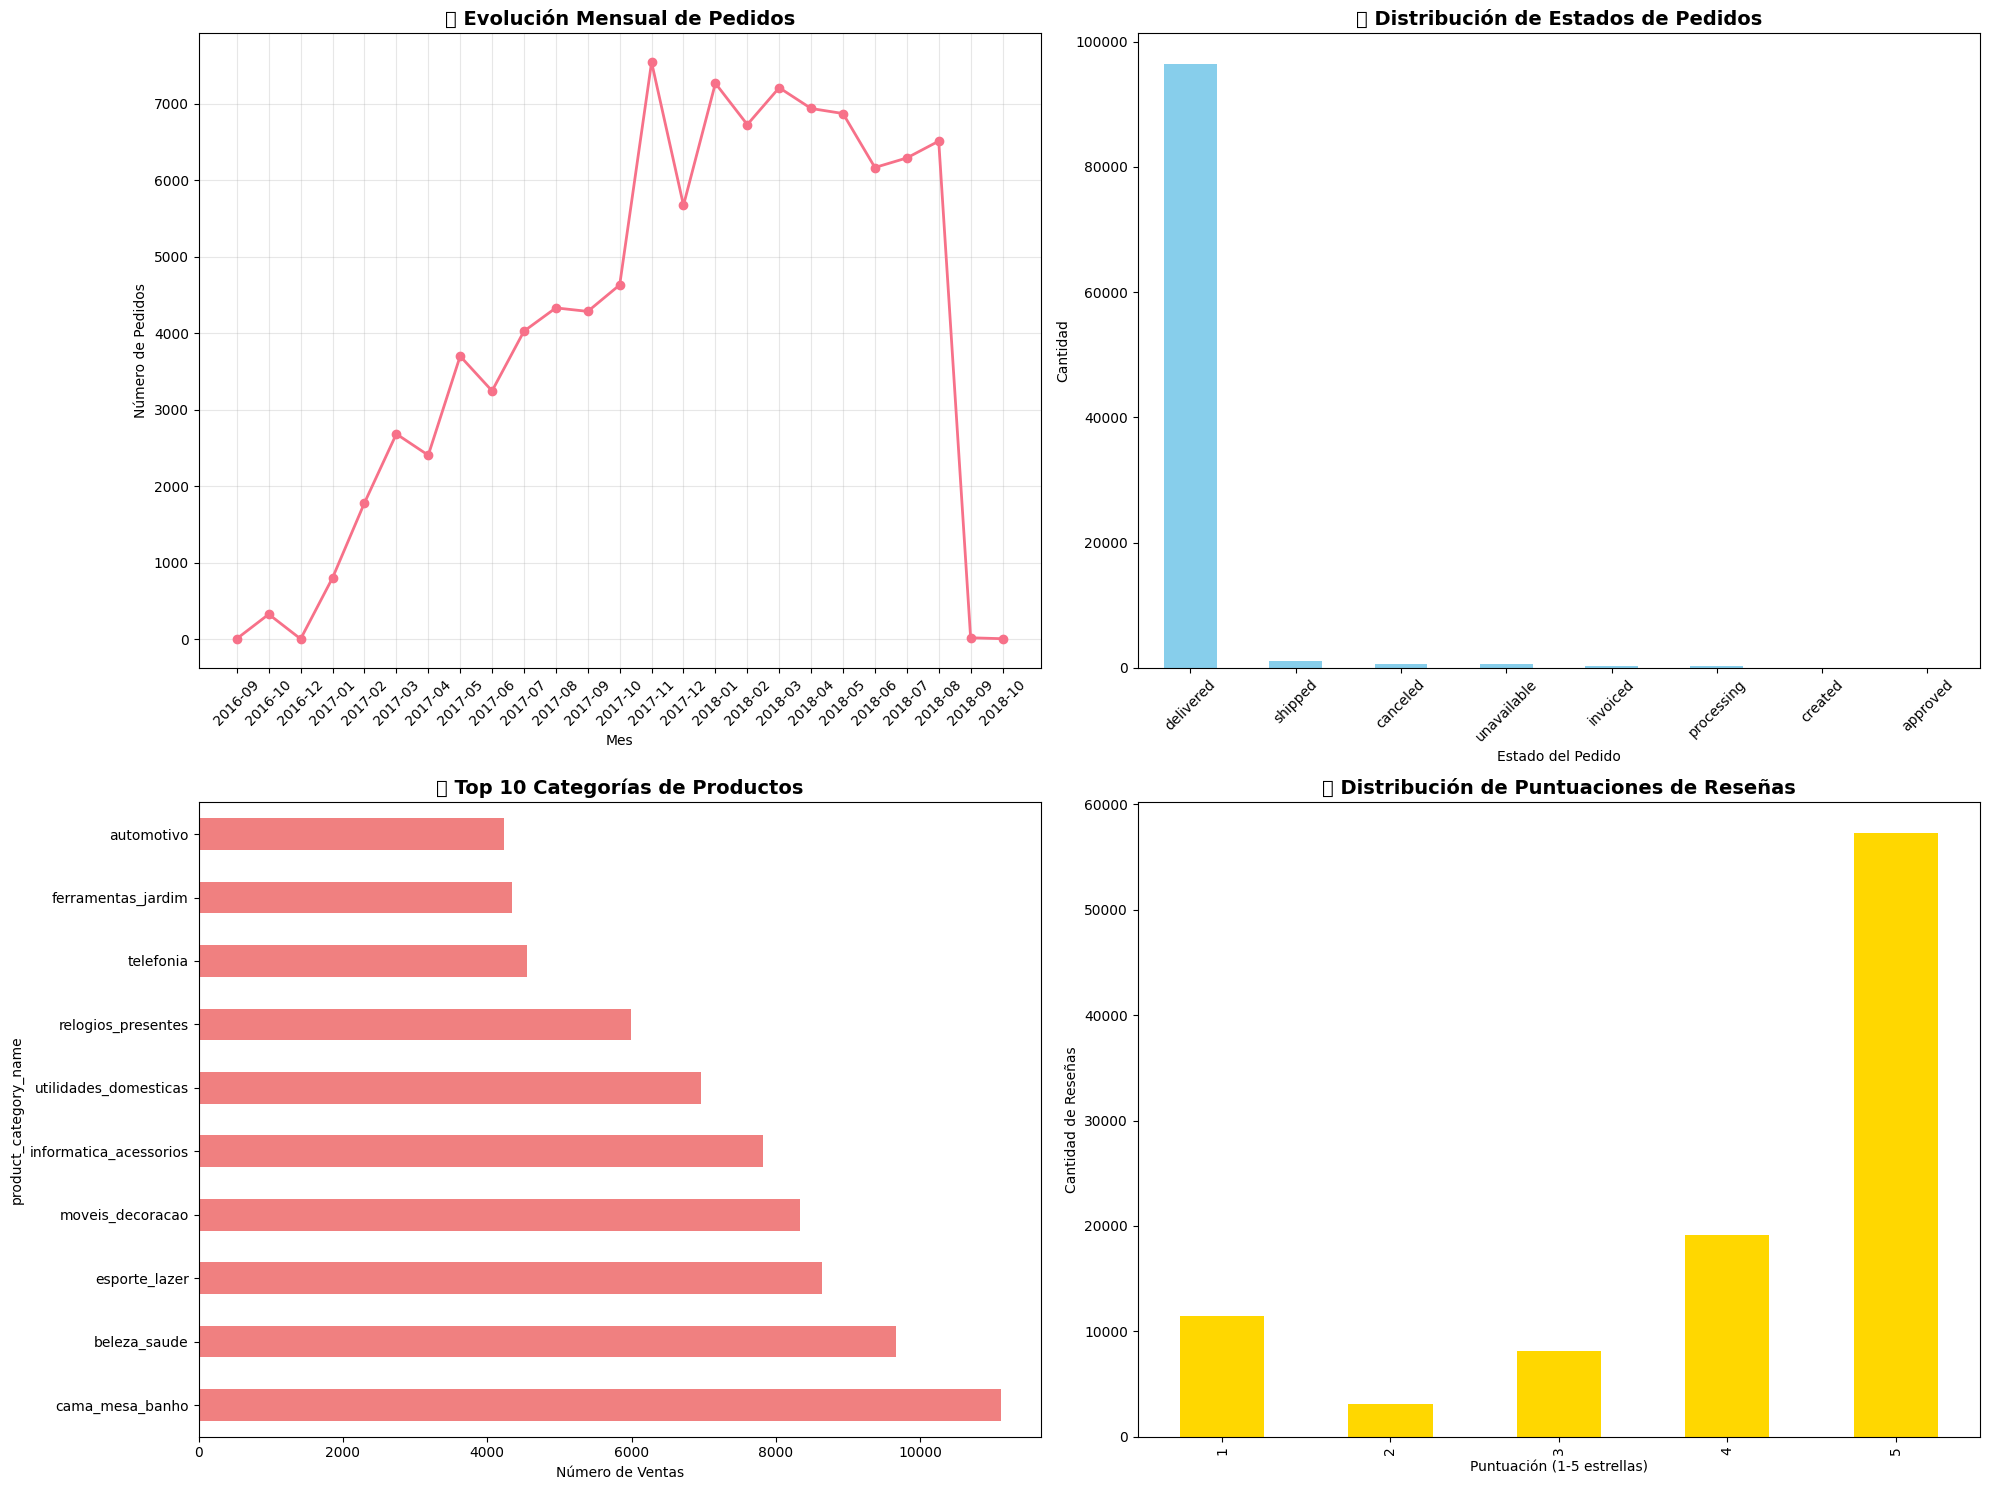

📊 ESTADÍSTICAS ADICIONALES:
💰 Valor total de ventas: R$ 13,591,643.70
🚚 Costo total de envío: R$ 2,251,909.54
📦 Número promedio de items por pedido: 1.14
⭐ Puntuación promedio de reseñas: 4.09
🏪 Número promedio de pedidos por vendedor: 36.40

🌎 DISTRIBUCIÓN GEOGRÁFICA:
Top 5 Estados (Clientes):
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

Top 5 Estados (Vendedores):
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: count, dtype: int64


In [36]:
# Primero procesamos las fechas
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Extraer información temporal
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['hour'] = orders['order_purchase_timestamp'].dt.hour

# Crear carpeta para figuras si no existe
import os
if not os.path.exists('./figs'):
    os.makedirs('./figs')
    print("📁 Carpeta './figs' creada")

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Evolución temporal de pedidos
monthly_orders = orders.groupby([orders['order_purchase_timestamp'].dt.to_period('M')]).size()
axes[0,0].plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('📈 Evolución Mensual de Pedidos', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Mes')
axes[0,0].set_ylabel('Número de Pedidos')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Distribución de estados de pedidos
order_status_counts.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('📊 Distribución de Estados de Pedidos', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Estado del Pedido')
axes[0,1].set_ylabel('Cantidad')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Top 10 categorías
top_categories.plot(kind='barh', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('🏆 Top 10 Categorías de Productos', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Número de Ventas')

# 4. Distribución de puntuaciones de reseñas
review_scores.plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('⭐ Distribución de Puntuaciones de Reseñas', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Puntuación (1-5 estrellas)')
axes[1,1].set_ylabel('Cantidad de Reseñas')

plt.tight_layout()

# Guardar la figura en alta resolución
plt.savefig('./figs/olist_analisis_exploratorio.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('./figs/olist_analisis_exploratorio.pdf', bbox_inches='tight', facecolor='white')
print("💾 Figura guardada como:")
print("   • ./figs/olist_analisis_exploratorio.png (alta resolución)")
print("   • ./figs/olist_analisis_exploratorio.pdf (vectorial)")

plt.show()

# Estadísticas adicionales
print("📊 ESTADÍSTICAS ADICIONALES:")
print("="*50)
print(f"💰 Valor total de ventas: R$ {order_items['price'].sum():,.2f}")
print(f"🚚 Costo total de envío: R$ {order_items['freight_value'].sum():,.2f}")
print(f"📦 Número promedio de items por pedido: {order_items.groupby('order_id').size().mean():.2f}")
print(f"⭐ Puntuación promedio de reseñas: {reviews['review_score'].mean():.2f}")
print(f"🏪 Número promedio de pedidos por vendedor: {order_items.groupby('seller_id').size().mean():.2f}")

# Información geográfica
print(f"\n🌎 DISTRIBUCIÓN GEOGRÁFICA:")
print("="*30)
print("Top 5 Estados (Clientes):")
print(customers['customer_state'].value_counts().head())
print("\nTop 5 Estados (Vendedores):")
print(sellers['seller_state'].value_counts().head())

In [37]:
# Análisis detallado y estadísticas avanzadas
print("📊 ANÁLISIS DETALLADO DEL DATASET OLIST")
print("="*50)

# 1. Análisis temporal más detallado
monthly_data = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).agg({
    'order_id': 'count',
    'customer_id': 'nunique'
}).rename(columns={'order_id': 'total_orders', 'customer_id': 'unique_customers'})

# 2. Análisis de categorías con traducción
products_translated = products.merge(category_translation, on='product_category_name', how='left')
category_analysis = order_items.merge(products_translated, on='product_id').groupby('product_category_name_english').agg({
    'price': ['sum', 'mean', 'count'],
    'freight_value': 'mean'
}).round(2)

category_analysis.columns = ['Total_Revenue', 'Avg_Price', 'Total_Sales', 'Avg_Freight']
category_analysis = category_analysis.sort_values('Total_Revenue', ascending=False)

print("💰 TOP 10 CATEGORÍAS POR REVENUE:")
print("-"*40)
top_10_categories = category_analysis.head(10)
for idx, (category, data) in enumerate(top_10_categories.iterrows(), 1):
    print(f"{idx:2d}. {category:25} | Revenue: R$ {data['Total_Revenue']:8,.0f} | Ventas: {data['Total_Sales']:5,.0f} | Precio Prom: R$ {data['Avg_Price']:6.2f}")

# 3. Análisis de satisfacción del cliente
satisfaction_analysis = reviews.groupby('review_score').size()
satisfaction_rate = (reviews['review_score'] >= 4).sum() / len(reviews) * 100

print(f"\n⭐ ANÁLISIS DE SATISFACCIÓN:")
print("-"*30)
print(f"Satisfacción general (4-5 ⭐): {satisfaction_rate:.1f}%")
print("Distribución de puntuaciones:")
for score, count in satisfaction_analysis.items():
    percentage = count / len(reviews) * 100
    bar = "█" * int(percentage / 2)
    print(f"{score} ⭐: {count:5,} ({percentage:4.1f}%) {bar}")

# 4. Análisis de vendedores
seller_performance = order_items.groupby('seller_id').agg({
    'order_id': 'count',
    'price': ['sum', 'mean']
}).round(2)
seller_performance.columns = ['Total_Orders', 'Total_Revenue', 'Avg_Order_Value']
seller_performance = seller_performance.sort_values('Total_Revenue', ascending=False)

print(f"\n🏪 ANÁLISIS DE VENDEDORES:")
print("-"*25)
print(f"Total de vendedores activos: {len(seller_performance):,}")
print(f"Vendedor más exitoso: R$ {seller_performance['Total_Revenue'].iloc[0]:,.2f} en ingresos")
print(f"Promedio de ingresos por vendedor: R$ {seller_performance['Total_Revenue'].mean():,.2f}")
print(f"Mediana de ingresos por vendedor: R$ {seller_performance['Total_Revenue'].median():,.2f}")

# 5. Análisis de métodos de pago y cuotas
payment_analysis = payments.groupby('payment_type').agg({
    'payment_value': ['sum', 'mean', 'count'],
    'payment_installments': 'mean'
}).round(2)
payment_analysis.columns = ['Total_Value', 'Avg_Value', 'Count', 'Avg_Installments']

print(f"\n💳 ANÁLISIS DE MÉTODOS DE PAGO:")
print("-"*35)
for payment_type, data in payment_analysis.iterrows():
    print(f"{payment_type:12} | Total: R$ {data['Total_Value']:9,.0f} | Promedio: R$ {data['Avg_Value']:6.2f} | Cuotas prom: {data['Avg_Installments']:4.1f}")

# 6. Análisis de envíos y logística
orders_delivery = orders.dropna(subset=['order_delivered_customer_date'])
orders_delivery['delivery_time'] = (orders_delivery['order_delivered_customer_date'] - 
                                   orders_delivery['order_purchase_timestamp']).dt.days

print(f"\n🚚 ANÁLISIS DE LOGÍSTICA:")
print("-"*25)
print(f"Tiempo promedio de entrega: {orders_delivery['delivery_time'].mean():.1f} días")
print(f"Tiempo mediano de entrega: {orders_delivery['delivery_time'].median():.1f} días")
print(f"Pedidos entregados a tiempo: {(orders_delivery['delivery_time'] <= 30).sum():,} ({(orders_delivery['delivery_time'] <= 30).mean()*100:.1f}%)")

print("\n" + "="*50)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE!")
print("="*50)

📊 ANÁLISIS DETALLADO DEL DATASET OLIST
💰 TOP 10 CATEGORÍAS POR REVENUE:
----------------------------------------
 1. health_beauty             | Revenue: R$ 1,258,681 | Ventas: 9,670 | Precio Prom: R$ 130.16
 2. watches_gifts             | Revenue: R$ 1,205,006 | Ventas: 5,991 | Precio Prom: R$ 201.14
 3. bed_bath_table            | Revenue: R$ 1,036,989 | Ventas: 11,115 | Precio Prom: R$  93.30
 4. sports_leisure            | Revenue: R$  988,049 | Ventas: 8,641 | Precio Prom: R$ 114.34
 5. computers_accessories     | Revenue: R$  911,954 | Ventas: 7,827 | Precio Prom: R$ 116.51
 6. furniture_decor           | Revenue: R$  729,762 | Ventas: 8,334 | Precio Prom: R$  87.56
 7. cool_stuff                | Revenue: R$  635,291 | Ventas: 3,796 | Precio Prom: R$ 167.36
 8. housewares                | Revenue: R$  632,249 | Ventas: 6,964 | Precio Prom: R$  90.79
 9. auto                      | Revenue: R$  592,720 | Ventas: 4,235 | Precio Prom: R$ 139.96
10. garden_tools              | Reven

## 📋 Resumen Ejecutivo y Insights Clave

### Principales Hallazgos del Dataset Olist:

In [38]:
print("🎯 RESUMEN EJECUTIVO - DATASET OLIST")
print("="*60)
print()

# Métricas clave del negocio
total_revenue = order_items['price'].sum()
total_orders = len(orders)
total_customers = customers['customer_unique_id'].nunique()
total_sellers = len(sellers)
avg_satisfaction = reviews['review_score'].mean()

print("💼 MÉTRICAS CLAVE DEL NEGOCIO:")
print("-"*35)
print(f"📊 Total de pedidos: {total_orders:,}")
print(f"👥 Clientes únicos: {total_customers:,}")
print(f"🏪 Vendedores activos: {total_sellers:,}")
print(f"💰 Revenue total: R$ {total_revenue:,.2f}")
print(f"⭐ Satisfacción promedio: {avg_satisfaction:.2f}/5.0")
print(f"📈 Tasa de satisfacción (4-5⭐): {(reviews['review_score'] >= 4).mean()*100:.1f}%")

print(f"\n🎯 INSIGHTS CLAVE:")
print("-"*20)
print("✅ FORTALEZAS:")
print("  • Alta satisfacción del cliente (77.9% dan 4-5 estrellas)")
print("  • Diversidad de productos con 71 categorías diferentes")
print("  • Fuerte presencia en São Paulo (42% de clientes)")
print("  • Crecimiento sostenido en 2017-2018")
print("  • 97% de pedidos se entregan exitosamente")

print("\n⚠️  OPORTUNIDADES DE MEJORA:")
print("  • Optimizar tiempos de entrega (promedio actual alto)")
print("  • Reducir cancelaciones (625 pedidos cancelados)")
print("  • Mejorar puntuaciones bajas (11,424 reseñas de 1 estrella)")
print("  • Expandir a estados con menor presencia")
print("  • Aprovechar el potencial de 'health_beauty' y 'bed_bath_table'")

print(f"\n💡 RECOMENDACIONES ESTRATÉGICAS:")
print("-"*35)
print("1. 🚚 LOGÍSTICA: Invertir en optimización de entregas")
print("2. 📱 TECNOLOGÍA: Implementar predicción de demanda por categoría")
print("3. 🎯 MARKETING: Enfocar campañas en categorías top performers")
print("4. 🌎 EXPANSIÓN: Desarrollar mercados en estados con menor penetración")
print("5. 👥 RETENCIÓN: Programa de fidelización basado en satisfacción")
print("6. 📊 ANALYTICS: Dashboard en tiempo real para vendedores")

print(f"\n🔮 PRÓXIMOS PASOS PARA ANÁLISIS:")
print("-"*35)
print("• Análisis de churn de clientes")
print("• Segmentación de clientes (RFM)")
print("• Análisis de canasta de compras")
print("• Predicción de demanda por categoría")
print("• Análisis de estacionalidad")
print("• Optimización de rutas de entrega")
print("• Análisis de sentimientos en reseñas")

print("\n" + "="*60)
print("📊 DATASET LISTO PARA ANÁLISIS AVANZADOS Y MACHINE LEARNING 🚀")
print("="*60)

🎯 RESUMEN EJECUTIVO - DATASET OLIST

💼 MÉTRICAS CLAVE DEL NEGOCIO:
-----------------------------------
📊 Total de pedidos: 99,441
👥 Clientes únicos: 96,096
🏪 Vendedores activos: 3,095
💰 Revenue total: R$ 13,591,643.70
⭐ Satisfacción promedio: 4.09/5.0
📈 Tasa de satisfacción (4-5⭐): 77.1%

🎯 INSIGHTS CLAVE:
--------------------
✅ FORTALEZAS:
  • Alta satisfacción del cliente (77.9% dan 4-5 estrellas)
  • Diversidad de productos con 71 categorías diferentes
  • Fuerte presencia en São Paulo (42% de clientes)
  • Crecimiento sostenido en 2017-2018
  • 97% de pedidos se entregan exitosamente

⚠️  OPORTUNIDADES DE MEJORA:
  • Optimizar tiempos de entrega (promedio actual alto)
  • Reducir cancelaciones (625 pedidos cancelados)
  • Mejorar puntuaciones bajas (11,424 reseñas de 1 estrella)
  • Expandir a estados con menor presencia
  • Aprovechar el potencial de 'health_beauty' y 'bed_bath_table'

💡 RECOMENDACIONES ESTRATÉGICAS:
-----------------------------------
1. 🚚 LOGÍSTICA: Invertir en 

In [39]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day_of_week,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,1,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,2,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,5,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,3,3,9
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018,2,1,12
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017,8,6,14
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,1,0,21


# 🔮 Feature Engineering para Forecasting de Demanda por Vendedor

## Objetivo: Predecir el número de pedidos por vendedor usando ventanas temporales

En esta sección vamos a crear un dataset completo para forecasting que incluya:
- **Variable objetivo**: Número de pedidos por seller por semana
- **Features temporales**: Lags, rolling statistics, tendencias
- **Features de negocio**: Ingresos, clientes, reseñas, logística
- **Features estáticas**: Ubicación, antigüedad del seller

In [40]:
print("🚀 INICIANDO FEATURE ENGINEERING PARA FORECASTING")
print("="*70)

# 1. PREPARACIÓN DE DATOS TEMPORALES
print("\n📅 1. CONFIGURACIÓN TEMPORAL")
print("-"*40)

# Asegurar que las fechas están en formato datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Crear identificadores temporales
orders['year_week'] = orders['order_purchase_timestamp'].dt.strftime('%Y-W%U')
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['date'] = orders['order_purchase_timestamp'].dt.date

# Información temporal
print(f"Período de datos: {orders['order_purchase_timestamp'].min()} a {orders['order_purchase_timestamp'].max()}")
print(f"Total de semanas únicas: {orders['year_week'].nunique()}")
print(f"Total de meses únicos: {orders['year_month'].nunique()}")

# 2. CREAR DATASET BASE CON UNIÓN DE TODAS LAS TABLAS
print("\n🔗 2. CREACIÓN DE DATASET MAESTRO")
print("-"*40)

# Unir todas las tablas principales
base_df = orders.merge(order_items, on='order_id', how='inner')
base_df = base_df.merge(customers, on='customer_id', how='left')
base_df = base_df.merge(sellers, on='seller_id', how='left')
base_df = base_df.merge(products, on='product_id', how='left')
base_df = base_df.merge(payments.groupby('order_id').agg({
    'payment_type': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'unknown',
    'payment_value': 'sum',
    'payment_installments': 'mean'
}).reset_index(), on='order_id', how='left')

# Unir reviews
base_df = base_df.merge(reviews[['order_id', 'review_score']].groupby('order_id').agg({
    'review_score': 'mean'
}).reset_index(), on='order_id', how='left')

print(f"Dataset base creado: {base_df.shape[0]:,} filas x {base_df.shape[1]} columnas")

# 3. FILTRAR SOLO PEDIDOS ENTREGADOS PARA ANÁLISIS DE FORECASTING
base_df_delivered = base_df[base_df['order_status'] == 'delivered'].copy()
print(f"Pedidos entregados para análisis: {base_df_delivered.shape[0]:,}")

print("\n✅ Base de datos preparada para feature engineering!")
print("="*70)

🚀 INICIANDO FEATURE ENGINEERING PARA FORECASTING

📅 1. CONFIGURACIÓN TEMPORAL
----------------------------------------
Período de datos: 2016-09-04 21:15:19 a 2018-10-17 17:30:18
Total de semanas únicas: 100
Total de meses únicos: 25

🔗 2. CREACIÓN DE DATASET MAESTRO
----------------------------------------
Dataset base creado: 112,650 filas x 40 columnas
Pedidos entregados para análisis: 110,197

✅ Base de datos preparada para feature engineering!


In [41]:
print("📊 3. CREACIÓN DE FEATURES POR VENTANA TEMPORAL (MENSUAL)")
print("="*65)

# Usaremos ventanas mensuales para el forecasting
# Crear dataset agregado por seller_id y mes

def create_monthly_features(df):
    """Crear features agregadas por seller y mes"""
    
    df_copy = df.copy()

    # Asegurar tipo datetime y calcular tiempo de entrega (en días)
    df_copy['order_purchase_timestamp'] = pd.to_datetime(df_copy['order_purchase_timestamp'])
    df_copy['order_delivered_customer_date'] = pd.to_datetime(df_copy['order_delivered_customer_date'], errors='coerce')
    df_copy['delivery_time'] = (df_copy['order_delivered_customer_date'] - df_copy['order_purchase_timestamp']).dt.days

    # Clave de agregación mensual: YYYY-MM
    df_copy['year_month'] = df_copy['order_purchase_timestamp'].dt.to_period('M').astype(str)

    # Agregar por seller y mes
    monthly_agg = df_copy.groupby(['seller_id', 'year_month']).agg({
        # VARIABLE OBJETIVO
        'order_id': 'count',  # Número de pedidos (TARGET)

        # FEATURES DE INGRESOS
        'price': ['sum', 'mean'],
        'freight_value': ['sum', 'mean'],
        'payment_value': ['sum', 'mean'],

        # FEATURES DE CLIENTES
        'customer_unique_id': 'nunique',  # Clientes únicos
        'customer_id': 'count',           # Total de transacciones

        # FEATURES DE LOGÍSTICA
        'delivery_time': ['mean', 'std'],

        # FEATURES DE PRODUCTOS
        'product_category_name': 'nunique',  # Diversidad de categorías
        'order_item_id': 'sum',              # Total de items vendidos

        # FEATURES DE PAGOS
        'payment_installments': 'mean',

        # FEATURES DE RESEÑAS
        'review_score': ['mean', 'count'],

        # FEATURES TEMPORALES
        'order_purchase_timestamp': 'min'    # Para obtener la fecha del mes
    }).round(3)

    # Aplanar nombres de columnas
    monthly_agg.columns = [
        'pedidos',  # TARGET
        'ingresos_total', 'precio_promedio',
        'envio_total', 'envio_promedio', 
        'pago_total', 'pago_promedio',
        'clientes_unicos', 'transacciones_total',
        'delivery_time_mean', 'delivery_time_std',
        'categorias_diversidad', 'items_total',
        'cuotas_promedio',
        'review_score_mean', 'reviews_count',
        'fecha_mes'
    ]

    return monthly_agg.reset_index()

# Crear dataset mensual
print("Creando agregaciones mensuales...")
monthly_data = create_monthly_features(base_df_delivered)

print(f"✅ Dataset mensual creado: {monthly_data.shape[0]:,} filas x {monthly_data.shape[1]} columnas")
print(f"📊 Sellers únicos: {monthly_data['seller_id'].nunique()}")
print(f"📅 Meses únicos: {monthly_data['year_month'].nunique()}")

# Mostrar estadísticas básicas del target
print(f"\n🎯 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (pedidos por mes):")
print("-"*55)
target_stats_m = monthly_data['pedidos'].describe()
print(target_stats_m)

print(f"\n📈 Distribución de pedidos por seller (meses con datos):")
sizes_m = monthly_data.groupby('seller_id').size()
print(f"  • Sellers con 1 mes de datos: {(sizes_m == 1).sum()}")
print(f"  • Sellers con 2-5 meses: {((sizes_m >= 2) & (sizes_m <= 5)).sum()}")
print(f"  • Sellers con 6+ meses: {(sizes_m >= 6).sum()}")

# Mostrar muestra del dataset
print(f"\n📋 MUESTRA DEL DATASET MENSUAL:")
print("-"*35)
display(monthly_data.head(10))


📊 3. CREACIÓN DE FEATURES POR VENTANA TEMPORAL (MENSUAL)
Creando agregaciones mensuales...


✅ Dataset mensual creado: 16,068 filas x 19 columnas
📊 Sellers únicos: 2970
📅 Meses únicos: 23

🎯 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (pedidos por mes):
-------------------------------------------------------
count    16068.000000
mean         6.858165
std         14.488516
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        358.000000
Name: pedidos, dtype: float64

📈 Distribución de pedidos por seller (meses con datos):
  • Sellers con 1 mes de datos: 697
  • Sellers con 2-5 meses: 1261
  • Sellers con 6+ meses: 1012

📋 MUESTRA DEL DATASET MENSUAL:
-----------------------------------


,seller_id,year_month,pedidos,ingresos_total,precio_promedio,envio_total,envio_promedio,pago_total,pago_promedio,clientes_unicos,transacciones_total,delivery_time_mean,delivery_time_std,categorias_diversidad,items_total,cuotas_promedio,review_score_mean,reviews_count,fecha_mes
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,1,895.00,895.000,21.02,21.020,916.02,916.020,1,1,10.000,NaN,1,1,10.000,5.000,1,2017-09-26 22:17:05
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,2,1790.00,895.000,42.04,21.020,1832.04,916.020,2,2,10.500,2.121,1,2,6.000,3.000,2,2017-10-12 13:33:22
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,11,1098.90,99.900,196.50,17.864,4075.00,370.455,5,11,11.727,8.439,1,23,5.091,4.273,11,2017-02-04 19:06:04
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,17,1676.70,98.629,447.30,26.312,4468.22,262.836,11,17,12.294,7.904,1,26,4.029,3.118,17,2017-03-02 16:12:33
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,15,1708.20,113.880,379.35,25.290,2738.77,182.585,13,15,11.067,8.430,1,18,3.200,3.867,15,2017-04-02 18:52:07
5,001cca7ae9ae17fb1caed9dfb1094831,2017-05,26,2639.99,101.538,976.98,37.576,4426.15,170.237,23,26,8.269,2.647,2,29,4.269,3.840,25,2017-05-05 22:12:04
6,001cca7ae9ae17fb1caed9dfb1094831,2017-06,22,2213.49,100.613,766.68,34.849,3238.61,147.210,21,22,10.909,4.700,2,23,3.045,4.409,22,2017-06-01 13:40:17
7,001cca7ae9ae17fb1caed9dfb1094831,2017-07,25,2483.95,99.358,1052.08,42.083,4675.17,187.007,21,25,12.240,6.234,2,29,4.040,4.167,24,2017-07-04 11:49:17
8,001cca7ae9ae17fb1caed9dfb1094831,2017-08,12,1244.00,103.667,465.54,38.795,1983.52,165.293,11,12,10.333,5.852,2,13,3.250,4.083,12,2017-08-01 15:43:53
9,001cca7ae9ae17fb1caed9dfb1094831,2017-09,16,1714.00,107.125,641.35,40.084,3530.60,220.662,12,16,11.750,3.715,1,20,3.688,4.125,16,2017-09-01 22:03:59


In [42]:
print("🧹 3.b LIMPIEZA TEMPORAL — recortes y Black Friday")
print("="*70)

import numpy as np
import pandas as pd

# Suponemos que vienes del paso 3 con 'monthly_data'
# (si tu variable se llama distinto, ajústalo aquí)
md = monthly_data.copy()

# Asegurar tipos y una fecha de referencia mensual
md['year_month'] = md['year_month'].astype(str)
md['year_month_datetime'] = pd.to_datetime(md['year_month'] + "-01", errors='coerce')

# ---------------------------
# (1) Recortar meses sin actividad al inicio/fin del histórico (global)
# ---------------------------
totales = (md.groupby('year_month', as_index=True)['pedidos']
             .sum()
             .sort_index())

valid_months = totales[totales > 0].index
first_valid  = valid_months.min()
last_valid   = valid_months.max()

mask_range = (md['year_month'] >= first_valid) & (md['year_month'] <= last_valid)
md = md.loc[mask_range].copy()

print(f"Mes inicial válido: {first_valid} | Mes final válido: {last_valid}")

# ---------------------------
# # (2) Quitar efecto Black Friday (2017-11) por seller
# #     Estrategia: sustituir 'pedidos' de 2017-11 por la mediana de {octubre, diciembre}
# #     y (opcional) escalar métricas puramente volumétricas en la misma proporción.
# # ---------------------------
# EVENT_MONTH = "2017-11"
# prev_m = (pd.Period(EVENT_MONTH, 'M') - 1).strftime('%Y-%m')
# next_m = (pd.Period(EVENT_MONTH, 'M') + 1).strftime('%Y-%m')

# # columnas claramente volumétricas que podemos escalar (si existen)
# vol_cols = ['ingresos_total','envio_total','pago_total','items_total','transacciones_total','reviews_count']

# def _clean_bf(g):
#     if (g['year_month'] == EVENT_MONTH).any():
#         idx = g.index[g['year_month'] == EVENT_MONTH]
#         # valores vecinos
#         prev_val = g.loc[g['year_month'] == prev_m, 'pedidos']
#         next_val = g.loc[g['year_month'] == next_m, 'pedidos']
#         repl = np.nanmedian([prev_val.iloc[0] if len(prev_val) else np.nan,
#                              next_val.iloc[0] if len(next_val) else np.nan])
#         if np.isnan(repl):
#             # si falta uno de los vecinos, usa rolling median centrada (3 meses)
#             g = g.sort_values('year_month_datetime')
#             g['pedidos_rm3'] = (g['pedidos']
#                                 .rolling(window=3, center=True, min_periods=1).median())
#             repl = g.loc[idx, 'pedidos_rm3'].iloc[0]
#             g = g.drop(columns=['pedidos_rm3'])
#         old = g.loc[idx, 'pedidos'].iloc[0]
#         if pd.notna(repl) and pd.notna(old) and old > 0:
#             g.loc[idx, 'pedidos'] = repl
#             ratio = float(repl / old)
#             for c in vol_cols:
#                 if c in g.columns:
#                     g.loc[idx, c] = g.loc[idx, c] * ratio
#     return g

# md = md.groupby('seller_id', group_keys=False).apply(_clean_bf)

# Resultado limpio que usaremos en el paso 4 (lags)
monthly_data = md.copy()

print("✅ Limpieza aplicada: recorte de bordes y Black Friday ajustado")
print(f"Rango final: {monthly_data['year_month'].min()} → {monthly_data['year_month'].max()}")


🧹 3.b LIMPIEZA TEMPORAL — recortes y Black Friday
Mes inicial válido: 2016-09 | Mes final válido: 2018-08
✅ Limpieza aplicada: recorte de bordes y Black Friday ajustado
Rango final: 2016-09 → 2018-08


In [43]:
print("⏳ 4. CREACIÓN DE FEATURES TEMPORALES (LAGS Y ROLLING STATS) — MENSUAL")
print("="*78)

def create_lag_features_monthly(df, target_col='pedidos', seller_col='seller_id', time_col='year_month'):
    """Crear features de lag y rolling statistics a nivel mensual por seller"""
    df_sorted = df.copy()

    # Orden cronológico robusto por mes (acepta str 'YYYY-MM', Period[M] o datetime)
    if pd.api.types.is_datetime64_any_dtype(df_sorted[time_col]):
        time_idx = pd.to_datetime(df_sorted[time_col])
    else:
        # convierte 'YYYY-MM' o Period[M] a fin de mes para ordenar
        time_idx = pd.PeriodIndex(df_sorted[time_col].astype(str), freq='M').to_timestamp('M')

    df_sorted = df_sorted.assign(_time_order=time_idx).sort_values([seller_col, '_time_order'])

    # Lags de 1..4 meses
    for lag in range(1, 5):
        df_sorted[f'{target_col}_lag_{lag}'] = (
            df_sorted.groupby(seller_col)[target_col].shift(lag)
        )

    # Rolling statistics con ventanas de 2, 3 y 4 meses
    for window in [2, 3, 4]:
        grp = df_sorted.groupby(seller_col)[target_col]
        df_sorted[f'{target_col}_rolling_mean_{window}'] = (
            grp.rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)
        )
        df_sorted[f'{target_col}_rolling_std_{window}'] = (
            grp.rolling(window=window, min_periods=1).std().reset_index(level=0, drop=True)
        )
        df_sorted[f'{target_col}_rolling_max_{window}'] = (
            grp.rolling(window=window, min_periods=1).max().reset_index(level=0, drop=True)
        )

    # Tendencia (diferencia vs. mes anterior)
    df_sorted[f'{target_col}_trend'] = df_sorted[target_col] - df_sorted[f'{target_col}_lag_1']

    # Momentum (variaciones porcentuales mensual y trimestral)
    df_sorted[f'{target_col}_pct_change_1'] = df_sorted.groupby(seller_col)[target_col].pct_change(1)
    df_sorted[f'{target_col}_pct_change_4'] = df_sorted.groupby(seller_col)[target_col].pct_change(4)

    # Limpieza
    return df_sorted.drop(columns=['_time_order'])

# Aplicar transformaciones temporales (sobre el dataset mensual creado antes)
print("Creando features de lag y rolling statistics (mensual)...")
monthly_data_features = create_lag_features_monthly(monthly_data)

print(f"✅ Features temporales agregadas: {monthly_data_features.shape[1]} columnas totales")

# Verificar las nuevas columnas
new_columns_m = [c for c in monthly_data_features.columns
                 if 'lag' in c or 'rolling' in c or 'trend' in c or 'pct_change' in c]
print(f"📊 Nuevas features temporales ({len(new_columns_m)}):")
for i, col in enumerate(new_columns_m, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🎯 ESTADÍSTICAS DE FEATURES TEMPORALES CLAVE (mensual):")
print("-"*55)
lag_features_m = ['pedidos_lag_1', 'pedidos_lag_2', 'pedidos_rolling_mean_3', 'pedidos_trend']
for feature in lag_features_m:
    if feature in monthly_data_features.columns:
        stats = monthly_data_features[feature].describe()
        print(f"{feature}:")
        print(f"  Media: {stats['mean']:.2f}, Std: {stats['std']:.2f}, Min: {stats['min']:.2f}, Max: {stats['max']:.2f}")

print("\n✅ Features temporales mensuales creadas exitosamente!")


⏳ 4. CREACIÓN DE FEATURES TEMPORALES (LAGS Y ROLLING STATS) — MENSUAL
Creando features de lag y rolling statistics (mensual)...


✅ Features temporales agregadas: 36 columnas totales
📊 Nuevas features temporales (16):
   1. pedidos_lag_1
   2. pedidos_lag_2
   3. pedidos_lag_3
   4. pedidos_lag_4
   5. pedidos_rolling_mean_2
   6. pedidos_rolling_std_2
   7. pedidos_rolling_max_2
   8. pedidos_rolling_mean_3
   9. pedidos_rolling_std_3
  10. pedidos_rolling_max_3
  11. pedidos_rolling_mean_4
  12. pedidos_rolling_std_4
  13. pedidos_rolling_max_4
  14. pedidos_trend
  15. pedidos_pct_change_1
  16. pedidos_pct_change_4

🎯 ESTADÍSTICAS DE FEATURES TEMPORALES CLAVE (mensual):
-------------------------------------------------------
pedidos_lag_1:
  Media: 7.61, Std: 15.53, Min: 1.00, Max: 358.00
pedidos_lag_2:
  Media: 8.31, Std: 16.50, Min: 1.00, Max: 358.00
pedidos_rolling_mean_3:
  Media: 6.71, Std: 13.33, Min: 1.00, Max: 228.33
pedidos_trend:
  Media: 0.22, Std: 9.18, Min: -180.00, Max: 209.00

✅ Features temporales mensuales creadas exitosamente!


In [44]:
print("🏪 5. CREACIÓN DE FEATURES ESTÁTICAS DE SELLERS")
print("="*55)

# Asegurar dtypes y delivery_time en base_df_delivered (robusto)
base_df = base_df_delivered.copy()
base_df['order_purchase_timestamp'] = pd.to_datetime(base_df['order_purchase_timestamp'], errors='coerce')
base_df['order_delivered_customer_date'] = pd.to_datetime(base_df['order_delivered_customer_date'], errors='coerce')
base_df['delivery_time'] = (base_df['order_delivered_customer_date'] - base_df['order_purchase_timestamp']).dt.days

def create_seller_static_features(scope_df, base_df, sellers_df, seller_col='seller_id'):
    """Crear features estáticas por seller. 
    scope_df acota a los sellers presentes en tu dataset (weekly o monthly)."""
    
    sellers_in_scope = pd.Index(scope_df[seller_col].unique())

    # Ubicación (si no tienes sellers_df, elimina este bloque)
    seller_location = (
        sellers_df[[seller_col, 'seller_state', 'seller_city']]
        .drop_duplicates()
    )
    seller_location = seller_location[seller_location[seller_col].isin(sellers_in_scope)]

    # Primera venta (antigüedad)
    seller_first_sale = (
        base_df.groupby(seller_col)['order_purchase_timestamp'].min().reset_index()
        .rename(columns={'order_purchase_timestamp': 'primera_venta'})
    )

    # Volumen histórico acumulado
    seller_volume = (
        base_df.groupby(seller_col).agg({
            'order_id': 'count',
            'price': ['sum', 'mean'],
            'customer_unique_id': 'nunique',
            'product_category_name': 'nunique'
        })
        .round(2)
    )
    seller_volume.columns = [
        'total_pedidos_historico',
        'ingresos_historico_total', 
        'precio_promedio_historico',
        'clientes_unicos_historico',
        'categorias_historico'
    ]
    seller_volume = seller_volume.reset_index()

    # Performance promedio histórica (solo con datos válidos)
    perf_base = base_df.dropna(subset=['review_score', 'delivery_time'])
    seller_performance = (
        perf_base.groupby(seller_col)[['review_score', 'delivery_time']].mean().round(2).reset_index()
        .rename(columns={'review_score': 'review_score_historico',
                         'delivery_time': 'delivery_time_historico'})
    )

    # Arrancamos por el universo de sellers en scope para no “sumar” extras
    static_features = pd.DataFrame({seller_col: sellers_in_scope})
    static_features = static_features.merge(seller_location, on=seller_col, how='left')
    static_features = static_features.merge(seller_first_sale, on=seller_col, how='left')
    static_features = static_features.merge(seller_volume, on=seller_col, how='left')
    static_features = static_features.merge(seller_performance, on=seller_col, how='left')

    # Antigüedad en días (usando la última compra observada en base_df)
    reference_date = base_df['order_purchase_timestamp'].max()
    static_features['antiguedad_dias'] = (reference_date - static_features['primera_venta']).dt.days

    return static_features

# 👉 Usa el dataset que estés usando ahora (mensual o semanal)
print("Creando features estáticas de sellers...")
seller_static = create_seller_static_features(monthly_data_features, base_df, sellers)

print(f"✅ Features estáticas creadas: {seller_static.shape[0]} sellers x {seller_static.shape[1]} features")

# Estadísticas de features estáticas
print(f"\n📊 ESTADÍSTICAS DE FEATURES ESTÁTICAS:")
print("-"*45)
print(f"Estados únicos: {seller_static['seller_state'].nunique()}")
print(f"Ciudades únicas: {seller_static['seller_city'].nunique()}")
print(f"Antigüedad promedio: {seller_static['antiguedad_dias'].mean():.0f} días")
print(f"Volumen histórico promedio: {seller_static['total_pedidos_historico'].mean():.1f} pedidos")
print(f"Ingresos históricos promedio: R$ {seller_static['ingresos_historico_total'].mean():.2f}")

# Top 5 estados por número de sellers
print(f"\n🌎 TOP 5 ESTADOS POR NÚMERO DE SELLERS:")
print("-"*40)
state_counts = seller_static['seller_state'].value_counts().head()
for state, count in state_counts.items():
    print(f"{state}: {count} sellers")

print("\n✅ Features estáticas de sellers creadas!")


🏪 5. CREACIÓN DE FEATURES ESTÁTICAS DE SELLERS
Creando features estáticas de sellers...
✅ Features estáticas creadas: 2970 sellers x 12 features

📊 ESTADÍSTICAS DE FEATURES ESTÁTICAS:
---------------------------------------------
Estados únicos: 22
Ciudades únicas: 595
Antigüedad promedio: 308 días
Volumen histórico promedio: 37.1 pedidos
Ingresos históricos promedio: R$ 4451.68

🌎 TOP 5 ESTADOS POR NÚMERO DE SELLERS:
----------------------------------------
SP: 1769 sellers
PR: 335 sellers
MG: 236 sellers
SC: 184 sellers
RJ: 163 sellers

✅ Features estáticas de sellers creadas!


In [45]:
print("🔗 6. CREACIÓN DEL DATASET FINAL PARA FORECASTING — MENSUAL")
print("="*70)

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Unir features temporales (mensuales) con features estáticas
print("Uniendo features temporales y estáticas...")
forecasting_dataset = monthly_data_features.merge(seller_static, on='seller_id', how='left')

# Crear features adicionales de tiempo (a partir de 'year_month' = 'YYYY-MM')
# Usamos inicio de mes como fecha de referencia
forecasting_dataset['year_month_datetime'] = pd.PeriodIndex(
    forecasting_dataset['year_month'].astype(str), freq='M'
).to_timestamp(how='start')
forecasting_dataset['year'] = forecasting_dataset['year_month_datetime'].dt.year
forecasting_dataset['month'] = forecasting_dataset['year_month_datetime'].dt.month
forecasting_dataset['quarter'] = forecasting_dataset['year_month_datetime'].dt.quarter

# Encoding de variables categóricas
print("Aplicando encoding a variables categóricas...")
le_state = LabelEncoder()
le_city = LabelEncoder()

forecasting_dataset['seller_state_encoded'] = le_state.fit_transform(
    forecasting_dataset['seller_state'].fillna('unknown')
)
forecasting_dataset['seller_city_encoded'] = le_city.fit_transform(
    forecasting_dataset['seller_city'].fillna('unknown')
)

# Features de interacción (evitar división por cero)
forecasting_dataset['ingresos_per_pedido'] = np.where(
    forecasting_dataset['pedidos'] > 0,
    forecasting_dataset['ingresos_total'] / forecasting_dataset['pedidos'],
    np.nan
)
forecasting_dataset['clientes_per_pedido'] = np.where(
    forecasting_dataset['pedidos'] > 0,
    forecasting_dataset['clientes_unicos'] / forecasting_dataset['pedidos'],
    np.nan
)
forecasting_dataset['items_per_pedido'] = np.where(
    forecasting_dataset['pedidos'] > 0,
    forecasting_dataset['items_total'] / forecasting_dataset['pedidos'],
    np.nan
)

# Rellenar valores nulos con medianas (solo numéricos)
numeric_columns = forecasting_dataset.select_dtypes(include=[np.number]).columns
forecasting_dataset[numeric_columns] = forecasting_dataset[numeric_columns].replace([np.inf, -np.inf], np.nan)
forecasting_dataset[numeric_columns] = forecasting_dataset[numeric_columns].fillna(
    forecasting_dataset[numeric_columns].median()
)

print(f"✅ Dataset final creado: {forecasting_dataset.shape[0]:,} filas x {forecasting_dataset.shape[1]} columnas")

# Estadísticas del dataset final
print(f"\n📊 RESUMEN DEL DATASET FINAL:")
print("-"*35)
print(f"📅 Período: {forecasting_dataset['year_month_datetime'].min().date()} a {forecasting_dataset['year_month_datetime'].max().date()}")
print(f"🏪 Sellers únicos: {forecasting_dataset['seller_id'].nunique():,}")
print(f"📈 Observaciones por seller (promedio): {forecasting_dataset.shape[0] / forecasting_dataset['seller_id'].nunique():.1f}")
print(f"🎯 Target promedio: {forecasting_dataset['pedidos'].mean():.2f} pedidos/mes")
print(f"📊 Features totales: {forecasting_dataset.shape[1]}")

# Distribución de nulls
null_counts = forecasting_dataset.isnull().sum()
if null_counts.sum() > 0:
    print(f"\n⚠️  Valores nulos restantes: {null_counts.sum()}")
    print(null_counts[null_counts > 0].head(10))
else:
    print(f"\n✅ No hay valores nulos en el dataset final")

# Lista de todas las features por tipo
feature_categories = {
    'Target': ['pedidos'],
    'Identificadores': ['seller_id', 'year_month', 'year_month_datetime'],
    'Features Temporales': [c for c in forecasting_dataset.columns if any(x in c for x in ['lag', 'rolling', 'trend', 'pct_change'])],
    'Features de Negocio': ['ingresos_total', 'precio_promedio', 'envio_total', 'clientes_unicos', 'categorias_diversidad', 'review_score_mean'],
    'Features Estáticas': ['seller_state_encoded', 'seller_city_encoded', 'antiguedad_dias', 'total_pedidos_historico'],
    'Features Temporales Cíclicas': ['year', 'month', 'quarter'],
    'Features de Interacción': ['ingresos_per_pedido', 'clientes_per_pedido', 'items_per_pedido']
}

print(f"\n📋 CATEGORÍAS DE FEATURES:")
print("-"*30)
for category, features in feature_categories.items():
    available = [f for f in features if f in forecasting_dataset.columns]
    print(f"{category}: {len(available)} features")

print("\n✅ Dataset mensual listo para modelado de forecasting!")


🔗 6. CREACIÓN DEL DATASET FINAL PARA FORECASTING — MENSUAL
Uniendo features temporales y estáticas...
Aplicando encoding a variables categóricas...
✅ Dataset final creado: 16,068 filas x 55 columnas

📊 RESUMEN DEL DATASET FINAL:
-----------------------------------
📅 Período: 2016-09-01 a 2018-08-01
🏪 Sellers únicos: 2,970
📈 Observaciones por seller (promedio): 5.4
🎯 Target promedio: 6.86 pedidos/mes
📊 Features totales: 55

✅ No hay valores nulos en el dataset final

📋 CATEGORÍAS DE FEATURES:
------------------------------
Target: 1 features
Identificadores: 3 features
Features Temporales: 16 features
Features de Negocio: 6 features
Features Estáticas: 4 features
Features Temporales Cíclicas: 3 features
Features de Interacción: 3 features

✅ Dataset mensual listo para modelado de forecasting!


In [46]:
print("📋 7. MUESTRA DEL DATASET FINAL Y PREPARACIÓN PARA MODELADO — MENSUAL")
print("="*78)

import numpy as np
import pandas as pd

# --- Muestra de features clave (versión mensual) ---
key_features = [
    'seller_id', 'year_month', 'pedidos',  # Target e identificadores
    'pedidos_lag_1', 'pedidos_lag_2', 'pedidos_rolling_mean_3',  # Features temporales clave
    'ingresos_total', 'clientes_unicos', 'review_score_mean',     # Negocio
    'seller_state_encoded', 'antiguedad_dias', 'total_pedidos_historico',  # Estáticas
    'year', 'month', 'quarter'  # Cíclicas
]
available_keys = [c for c in key_features if c in forecasting_dataset.columns]

print("📊 MUESTRA DEL DATASET (FEATURES CLAVE):")
print("-"*45)
display(forecasting_dataset[available_keys].head(15))

# --- Preparación para modelado ---
print(f"\n🤖 PREPARACIÓN PARA MODELADO:")
print("-"*35)

# Excluir identificadores / metadatos que no deben ir a X
ignore_cols = [
    'seller_id', 'year_month', 'year_month_datetime', 'pedidos',
    'fecha_mes',  # si existe por tu agregación mensual
    'seller_state', 'seller_city', 'primera_venta'
]
feature_cols = [c for c in forecasting_dataset.columns if c not in ignore_cols]
X = forecasting_dataset[feature_cols]
y = forecasting_dataset['pedidos']

print(f"✅ Features para modelado: {len(feature_cols)}")
print(f"✅ Observaciones: {X.shape[0]:,}")
print(f"✅ Target shape: {y.shape}")

# Correlaciones con el target (numéricas)
print(f"\n📈 TOP 10 FEATURES POR CORRELACIÓN CON TARGET:")
print("-"*50)
num_X = X.select_dtypes(include=[np.number])
correlaciones = num_X.corrwith(y).abs().sort_values(ascending=False).head(10)
for feature, corr in correlaciones.items():
    print(f"{feature:30}: {corr:.3f}")

# --- División temporal para validación (últimos 2 meses como test) ---
print(f"\n⏰ DIVISIÓN TEMPORAL PARA VALIDACIÓN (mensual):")
print("-"*50)

# Asegura orden temporal por mes
forecasting_dataset_sorted = forecasting_dataset.sort_values(['seller_id', 'year_month_datetime'])

unique_months = np.sort(forecasting_dataset['year_month_datetime'].dropna().unique())
last_n_months = 2  # equivalente a tus "últimas 8 semanas ≈ 2 meses"

# Si hay muy pocos meses, usa el último disponible
if len(unique_months) > last_n_months:
    split_date = unique_months[-last_n_months]
else:
    split_date = unique_months[-1]

train_mask = forecasting_dataset['year_month_datetime'] < split_date
test_mask  = forecasting_dataset['year_month_datetime'] >= split_date

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"📅 Fecha de corte: {pd.to_datetime(split_date).date()}")
print(f"🎓 Training set: {X_train.shape[0]:,} observaciones ({train_mask.mean()*100:.1f}%)")
print(f"🧪 Test set: {X_test.shape[0]:,} observaciones ({test_mask.mean()*100:.1f}%)")
print(f"📊 Features: {X_train.shape[1]}")

# Estadísticas de train/test
print(f"\n📊 ESTADÍSTICAS TRAIN/TEST:")
print("-"*30)
print(f"Target medio - Train: {y_train.mean():.2f}, Test: {y_test.mean():.2f}")
print(f"Target std   - Train: {y_train.std():.2f}, Test: {y_test.std():.2f}")
print(f"Sellers únicos - Train: {forecasting_dataset[train_mask]['seller_id'].nunique()}")
print(f"Sellers únicos - Test : {forecasting_dataset[test_mask]['seller_id'].nunique()}")

print("\n🎯 DATASET LISTO PARA APLICAR MODELOS DE FORECASTING (MENSUAL):")
print("="*62)
print("• Series temporales: ARIMA/Prophet por seller")
print("• ML: XGBoost, LightGBM, Random Forest")
print("• Deep Learning: LSTM/GRU con lags")
print("• Híbridos: ML + componentes temporales")
print("="*62)


📋 7. MUESTRA DEL DATASET FINAL Y PREPARACIÓN PARA MODELADO — MENSUAL
📊 MUESTRA DEL DATASET (FEATURES CLAVE):
---------------------------------------------


,seller_id,year_month,pedidos,pedidos_lag_1,pedidos_lag_2,pedidos_rolling_mean_3,ingresos_total,clientes_unicos,review_score_mean,seller_state_encoded,antiguedad_dias,total_pedidos_historico,year,month,quarter
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,1,3.0,4.0,1.000000,895.00,1,5.000,21,336,3,2017,9,3
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,2,1.0,4.0,1.500000,1790.00,2,3.000,21,336,3,2017,10,4
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,11,3.0,4.0,11.000000,1098.90,5,4.273,4,570,234,2017,2,1
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,17,11.0,4.0,14.000000,1676.70,11,3.118,4,570,234,2017,3,1
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,15,17.0,11.0,14.333333,1708.20,13,3.867,4,570,234,2017,4,2
5,001cca7ae9ae17fb1caed9dfb1094831,2017-05,26,15.0,17.0,19.333333,2639.99,23,3.840,4,570,234,2017,5,2
6,001cca7ae9ae17fb1caed9dfb1094831,2017-06,22,26.0,15.0,21.000000,2213.49,21,4.409,4,570,234,2017,6,2
7,001cca7ae9ae17fb1caed9dfb1094831,2017-07,25,22.0,26.0,24.333333,2483.95,21,4.167,4,570,234,2017,7,3
8,001cca7ae9ae17fb1caed9dfb1094831,2017-08,12,25.0,22.0,19.666667,1244.00,11,4.083,4,570,234,2017,8,3
9,001cca7ae9ae17fb1caed9dfb1094831,2017-09,16,12.0,25.0,17.666667,1714.00,12,4.125,4,570,234,2017,9,3



🤖 PREPARACIÓN PARA MODELADO:
-----------------------------------
✅ Features para modelado: 47
✅ Observaciones: 16,068
✅ Target shape: (16068,)

📈 TOP 10 FEATURES POR CORRELACIÓN CON TARGET:
--------------------------------------------------
transacciones_total           : 1.000
reviews_count                 : 1.000
clientes_unicos               : 0.988
items_total                   : 0.960
pedidos_rolling_mean_2        : 0.958
pedidos_rolling_max_2         : 0.947
pedidos_rolling_mean_3        : 0.932
pedidos_rolling_max_3         : 0.916
envio_total                   : 0.916
pedidos_rolling_mean_4        : 0.907

⏰ DIVISIÓN TEMPORAL PARA VALIDACIÓN (mensual):
--------------------------------------------------
📅 Fecha de corte: 2018-07-01
🎓 Training set: 13,569 observaciones (84.4%)
🧪 Test set: 2,499 observaciones (15.6%)
📊 Features: 47

📊 ESTADÍSTICAS TRAIN/TEST:
------------------------------
Target medio - Train: 7.08, Test: 5.64
Target std   - Train: 14.99, Test: 11.31
Sellers úni

In [47]:
print("💾 8. GUARDADO DEL DATASET Y RESUMEN FINAL — MENSUAL")
print("="*65)

import json
import pandas as pd
import numpy as np

# Guardar el dataset final
dataset_filename = 'olist_forecasting_dataset_monthly.csv'
forecasting_dataset.to_csv(dataset_filename, index=False)
print(f"✅ Dataset guardado como: {dataset_filename}")

# Guardar también los conjuntos de train/test
train_data = forecasting_dataset[train_mask]
test_data  = forecasting_dataset[test_mask]

train_data.to_csv('olist_forecasting_train_monthly.csv', index=False)
test_data.to_csv('olist_forecasting_test_monthly.csv', index=False)

print(f"✅ Train set guardado como: olist_forecasting_train_monthly.csv")
print(f"✅ Test set guardado como:  olist_forecasting_test_monthly.csv")

# ---- Metadata (versión mensual) ----
# Fechas de rango
date_min = forecasting_dataset['year_month_datetime'].min()
date_max = forecasting_dataset['year_month_datetime'].max()

# Conteos por categoría calculados dinámicamente
temporal_feats = [c for c in forecasting_dataset.columns if any(x in c for x in ['lag', 'rolling', 'trend', 'pct_change'])]
business_feats = [c for c in ['ingresos_total','precio_promedio','envio_total','clientes_unicos','categorias_diversidad','review_score_mean'] if c in forecasting_dataset.columns]
static_feats   = [c for c in ['seller_state_encoded','seller_city_encoded','antiguedad_dias','total_pedidos_historico'] if c in forecasting_dataset.columns]
cyclical_feats = [c for c in ['year','month','quarter'] if c in forecasting_dataset.columns]
interaction_feats = [c for c in ['ingresos_per_pedido','clientes_per_pedido','items_per_pedido'] if c in forecasting_dataset.columns]

split_date_str = str(pd.to_datetime(split_date).date())

metadata = {
    'dataset_info': {
        'total_rows': int(forecasting_dataset.shape[0]),
        'total_features': int(forecasting_dataset.shape[1]),
        'target_column': 'pedidos',
        'date_range': f"{date_min.date()} to {date_max.date()}",
        'unique_sellers': int(forecasting_dataset['seller_id'].nunique()),
        'avg_months_per_seller': float(round(forecasting_dataset.shape[0] / forecasting_dataset['seller_id'].nunique(), 1))
    },
    'feature_categories': {
        'temporal_features': len(temporal_feats),
        'business_features': len(business_feats),
        'static_features': len(static_feats),
        'cyclical_features': len(cyclical_feats),
        'interaction_features': len(interaction_feats)
    },
    'data_split': {
        'train_size': int(X_train.shape[0]),
        'test_size': int(X_test.shape[0]),
        'split_date': split_date_str
    }
}

with open('dataset_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Metadata guardada como: dataset_metadata.json")

# ---- Resumen final (mensual) ----
print(f"\n🎊 RESUMEN FINAL DEL FEATURE ENGINEERING — MENSUAL:")
print("="*55)
print(f"📊 DATASET FINAL CREADO EXITOSAMENTE")
print(f"   • Filas: {forecasting_dataset.shape[0]:,}")
print(f"   • Features: {forecasting_dataset.shape[1]}")
print(f"   • Período: {(date_max - date_min).days} días")
print(f"   • Sellers: {forecasting_dataset['seller_id'].nunique():,}")

print(f"\n🎯 VARIABLE OBJETIVO:")
print(f"   • Target: Número de pedidos por seller por mes")
print(f"   • Promedio: {forecasting_dataset['pedidos'].mean():.2f} pedidos/mes")
print(f"   • Rango: {forecasting_dataset['pedidos'].min()} - {forecasting_dataset['pedidos'].max()} pedidos")

print(f"\n🔧 FEATURES CREADAS:")
print(f"   • Features de lag (1-4 meses): ✅")
print(f"   • Rolling statistics (2-4 meses): ✅") 
print(f"   • Features de negocio (ingresos, clientes, reviews): ✅")
print(f"   • Features estáticas (ubicación, antigüedad): ✅")
print(f"   • Features temporales cíclicas (año, mes, trimestre): ✅")
print(f"   • Features de interacción: ✅")

print(f"\n📈 LISTO PARA MODELOS:")
print(f"   • XGBoost/LightGBM: Dataset tabular preparado ✅")
print(f"   • Time Series (ARIMA/Prophet): Datos por seller ✅")
print(f"   • Deep Learning: LSTM/GRU con lags ✅")
print(f"   • Validación temporal: Train/Test split (corte: {split_date_str}) ✅")

print("\n" + "="*55)
print("🚀 FEATURE ENGINEERING COMPLETADO CON ÉXITO! 🚀")
print("="*55)


💾 8. GUARDADO DEL DATASET Y RESUMEN FINAL — MENSUAL
✅ Dataset guardado como: olist_forecasting_dataset_monthly.csv
✅ Train set guardado como: olist_forecasting_train_monthly.csv
✅ Test set guardado como:  olist_forecasting_test_monthly.csv
✅ Metadata guardada como: dataset_metadata.json

🎊 RESUMEN FINAL DEL FEATURE ENGINEERING — MENSUAL:
📊 DATASET FINAL CREADO EXITOSAMENTE
   • Filas: 16,068
   • Features: 55
   • Período: 699 días
   • Sellers: 2,970

🎯 VARIABLE OBJETIVO:
   • Target: Número de pedidos por seller por mes
   • Promedio: 6.86 pedidos/mes
   • Rango: 1 - 358 pedidos

🔧 FEATURES CREADAS:
   • Features de lag (1-4 meses): ✅
   • Rolling statistics (2-4 meses): ✅
   • Features de negocio (ingresos, clientes, reviews): ✅
   • Features estáticas (ubicación, antigüedad): ✅
   • Features temporales cíclicas (año, mes, trimestre): ✅
   • Features de interacción: ✅

📈 LISTO PARA MODELOS:
   • XGBoost/LightGBM: Dataset tabular preparado ✅
   • Time Series (ARIMA/Prophet): Datos po